<a href="https://colab.research.google.com/github/garypapa/ML/blob/main/Exercise_4_Papadopoulou_Garyfallia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Μερος 1 - Ημι-επιβλεπόμενη Μάθηση

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import collections

#Question 1

In [ ]:
df = pd.read_csv('wine-missing.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Fixed Acidity:** Most values are around 7, but it can go lower or much higher.

**Volatile Acidity:** Values are generally small and don't change too much across samples.

**Citric Acid:** Stays around 0.3 for most wines, with cases close to zero.

**Residual Sugar:** This feature changes a lot, some wines have very little sugar and some have a lot.

**Chlorides:** Mostly low values, but there are a few samples that are much higher.

**Free Sulfur Dioxide:** The numbers vary quite a bit, so wines differ a lot in this feature.

**Total Sulfur Dioxide:** Very wide range, meaning some wines have very low amounts while others have very high.

**Density:** This one hardly changes.

**pH:** Stays in a small range.

**Sulphates:** Values vary but overall stay between 0.2 and 2.

**Alcohol:** Mostly around 10-11, but there are wines with lower or higher alcohol levels.

**Quality:** Most wines have a quality rating around 5 or 6.

In [ ]:
print(df.isna().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


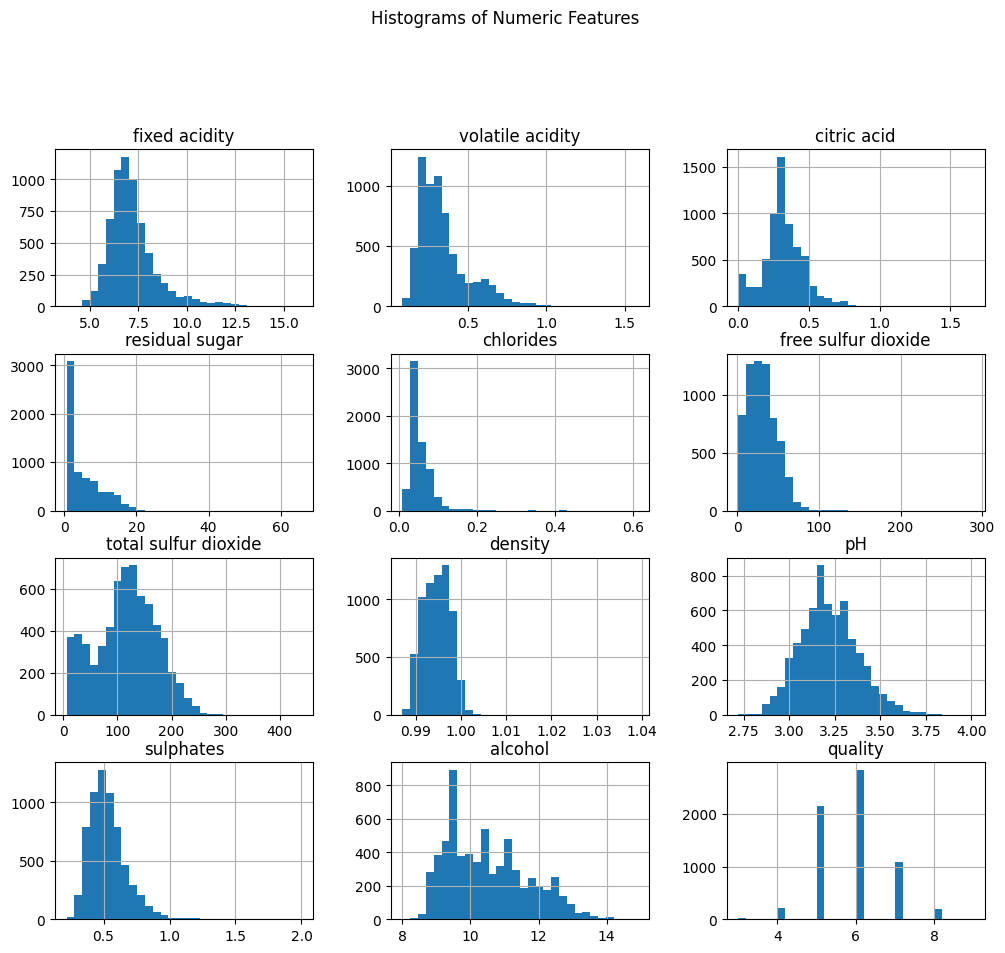

In [ ]:
df.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.show()

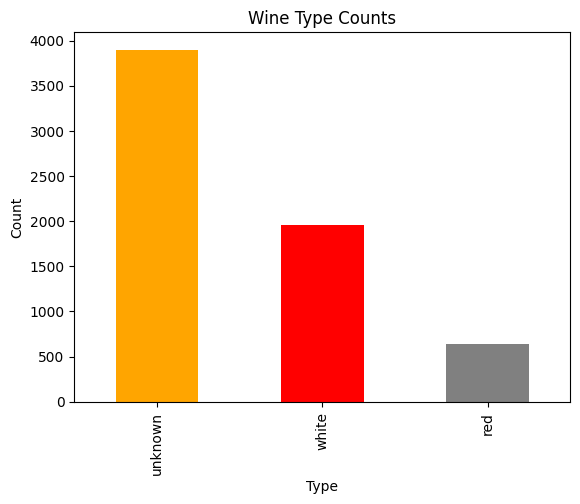

In [ ]:
df['type'] = df['type'].fillna('unknown')
df['type'].value_counts().plot(kind='bar', color=['orange', 'red', 'gray'])
plt.title("Wine Type Counts")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

#Question 2

In [ ]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown': 2})
X = df.drop(columns=['type']).to_numpy()
y = df['type'].to_numpy()
X.shape, y.shape

((6497, 12), (6497,))

#Question 3

In [ ]:
mask_known = y != 2
mask_unknown = y == 2

x_known = X[mask_known]
y_known = y[mask_known]

x_unknown = X[mask_unknown]

x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

#Question 4

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known
)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1819, 12) (780, 12)
(1819,) (780,)


#Question 5

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

print("TRAIN SET:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

print("\nTEST SET:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

TRAIN SET:
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1: 0.9988851727982163

TEST SET:
Accuracy: 0.9987179487179487
Precision: 0.9948186528497409
Recall: 1.0
F1: 0.9974025974025974


The accuracy is very high.
Since the dataset is not perfectly balanced between red and white wines, F1-score is more representative, because it combines both Precision and Recall.

#Question 6

In [ ]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_pred_train_bal = rf_balanced.predict(x_train)
y_pred_test_bal = rf_balanced.predict(x_test)

print("TRAIN SET (Balanced):")
print("Accuracy:", accuracy_score(y_train, y_pred_train_bal))
print("Precision:", precision_score(y_train, y_pred_train_bal))
print("Recall:", recall_score(y_train, y_pred_train_bal))
print("F1:", f1_score(y_train, y_pred_train_bal))

print("\nTEST SET (Balanced):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_bal))
print("Precision:", precision_score(y_test, y_pred_test_bal))
print("Recall:", recall_score(y_test, y_pred_test_bal))
print("F1:", f1_score(y_test, y_pred_test_bal))


TRAIN SET (Balanced):
Accuracy: 0.999450247388675
Precision: 0.9977728285077951
Recall: 1.0
F1: 0.9988851727982163

TEST SET (Balanced):
Accuracy: 0.9948717948717949
Precision: 0.9947368421052631
Recall: 0.984375
F1: 0.9895287958115183


With class_weight='balanced', the model adjusts the importance of each class depending on how often it appears. This helps when the dataset is imbalanced. After retraining, the metrics remain high, but the test recall becomes slightly lower because the model is now more careful with the minority class.

#Question 7

In [ ]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)
y_unknown_proba[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#Question 8

In [ ]:
y_unknown_pred = []

for probs in y_unknown_proba:
    red_prob = probs[1]

    if red_prob > 0.65:
        y_unknown_pred.append('red')
    elif red_prob < 0.35:
        y_unknown_pred.append('white')
    else:
        y_unknown_pred.append('unknown')

collections.Counter(y_unknown_pred)

Counter({'white': 2939, 'unknown': 51, 'red': 908})

#Question 9

In [ ]:
x_confident = x_unknown[(np.array(y_unknown_pred) != "unknown")]
y_confident = np.array(y_unknown_pred)[np.array(y_unknown_pred) != "unknown"]

label_map = {'white': 0, 'red': 1}
y_confident_num = np.array([label_map[label] for label in y_confident])

print(x_confident.shape, y_confident_num.shape)

(3847, 12) (3847,)


In [ ]:
x_train_new = np.vstack([x_train, x_confident])
y_train_new = np.concatenate([y_train, y_confident_num])

print(x_train_new.shape, y_train_new.shape)

(5666, 12) (5666,)


In [ ]:
rf_new = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_new.fit(x_train_new, y_train_new)

y_pred_train_new = rf_new.predict(x_train)
y_pred_test_new  = rf_new.predict(x_test)

print("TRAIN accuracy:", accuracy_score(y_train, y_pred_train_new))
print("TEST accuracy:", accuracy_score(y_test, y_pred_test_new))


TRAIN accuracy: 0.999450247388675
TEST accuracy: 0.9948717948717949


#Question 10

In [ ]:
mask_not_confident = (np.array(y_unknown_pred) == "unknown")

x_remaining = x_unknown[mask_not_confident]

print("Remaining unknown samples:", x_remaining.shape[0])

Remaining unknown samples: 51


In [ ]:
x_train_loop = x_train_new.copy()
y_train_loop = y_train_new.copy()
x_unknown_loop = x_remaining.copy()

iteration = 1

while True:
    print(f"---- Iteration {iteration} ----")

    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(x_train_loop, y_train_loop)

    probs = model.predict_proba(x_unknown_loop)

    new_x = []
    new_y = []

    for i, p in enumerate(probs):
        red_prob = p[1]

        if red_prob > 0.65:
            new_x.append(x_unknown_loop[i])
            new_y.append(1)
        elif red_prob < 0.35:
            new_x.append(x_unknown_loop[i])
            new_y.append(0)

    if len(new_x) == 0:
        print("No more confident samples. Stopping.")
        break

    print("New confident samples:", len(new_x))

    x_train_loop = np.vstack([x_train_loop, new_x])
    y_train_loop = np.concatenate([y_train_loop, new_y])

    keep_mask = []
    for p in probs:
        red_prob = p[1]
        if (red_prob > 0.65) or (red_prob < 0.35):
            keep_mask.append(False)
        else:
            keep_mask.append(True)

    x_unknown_loop = x_unknown_loop[np.array(keep_mask)]
    print("Remaining unknown samples:", x_unknown_loop.shape[0])

    iteration += 1


---- Iteration 1 ----
New confident samples: 23
Remaining unknown samples: 28
---- Iteration 2 ----
New confident samples: 2
Remaining unknown samples: 26
---- Iteration 3 ----
New confident samples: 5
Remaining unknown samples: 21
---- Iteration 4 ----
New confident samples: 1
Remaining unknown samples: 20
---- Iteration 5 ----
No more confident samples. Stopping.


#Μέρος 2 - Αξιολόγηση Μοντέλων

#Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#Question 1

In [ ]:
df_full = pd.read_csv('wine-full.csv')
df_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
quality_counts = df_full['quality'].value_counts().sort_index()
print(quality_counts)

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


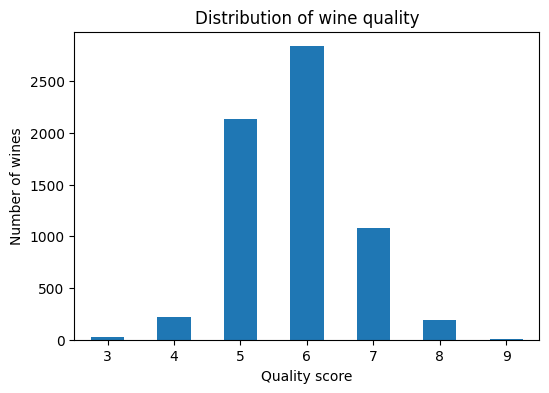

In [ ]:
plt.figure(figsize=(6,4))
quality_counts.plot(kind='bar')
plt.xlabel('Quality score')
plt.ylabel('Number of wines')
plt.title('Distribution of wine quality')
plt.xticks(rotation=0)
plt.show()

No, the quality score is not balanced.
From the plot and the counts, we see that most wines have quality 5 or 6, while very few have scores like 3, 8, or 9.

#Question 2

In [ ]:
print(df_full['type'].unique())
df_full.groupby('type')['quality'].mean()

['white' 'red']


,quality
type,
red,5.636023
white,5.877909


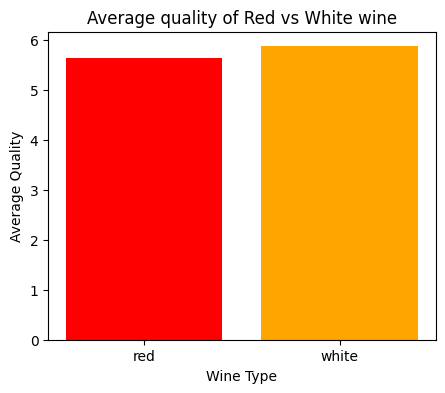

In [ ]:
mean_quality = df_full.groupby('type')['quality'].mean()
plt.figure(figsize=(5,4))
plt.bar(mean_quality.index, mean_quality.values, color=['red', 'orange'])

plt.xlabel("Wine Type")
plt.ylabel("Average Quality")
plt.title("Average quality of Red vs White wine")

plt.show()

Based on the average quality, white wines seem to have slightly better quality than red wines.

*   White wine has an average quality of about 5.88
*   Red wine has an average quality of about 5.64

The difference is small, but the plot also shows that white wines are shifted a bit towards higher quality scores.

#Question 3

In [ ]:
dry = df_full[df_full['residual sugar'] <= 4]
sweet = df_full[df_full['residual sugar'] >= 45]

print("Number of dry wines:", len(dry))
print("Number of sweet wines:", len(sweet))

print("Average dry quality:", dry['quality'].mean())
print("Average sweet quality:", sweet['quality'].mean())

Number of dry wines: 3569
Number of sweet wines: 1
Average dry quality: 5.822079013729336
Average sweet quality: 6.0


In [ ]:
print(">= 12 g/L:", len(df_full[df_full['residual sugar'] >= 12]))
print(">= 15 g/L:", len(df_full[df_full['residual sugar'] >= 15]))
print(">= 20 g/L:", len(df_full[df_full['residual sugar'] >= 20]))

>= 12 g/L: 850
>= 15 g/L: 337
>= 20 g/L: 18


Number of dry wines: 3569
Number of sweet wines: 850
Average dry wine quality: 5.822079013729336
Average sweet wine quality: 5.7564705882352944


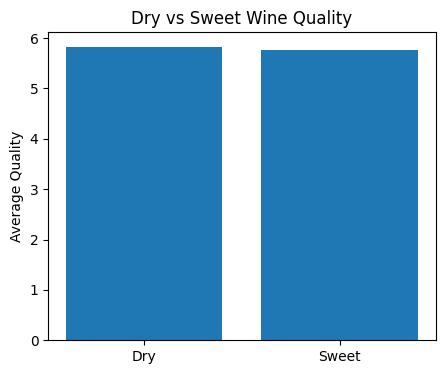

In [ ]:
dry = df_full[df_full['residual sugar'] <= 4]
sweet = df_full[df_full['residual sugar'] >= 12]

print("Number of dry wines:", len(dry))
print("Number of sweet wines:", len(sweet))

dry_mean = dry['quality'].mean()
sweet_mean = sweet['quality'].mean()

print("Average dry wine quality:", dry_mean)
print("Average sweet wine quality:", sweet_mean)

plt.figure(figsize=(5,4))
plt.bar(['Dry', 'Sweet'], [dry_mean, sweet_mean])
plt.ylabel("Average Quality")
plt.title("Dry vs Sweet Wine Quality")
plt.show()


At first, I tried to classify sweet wine using the typical threshold of ≥ 45 g/L residual sugar, because this corresponds to the standard definition of "sweet wine".
However, when I applied this rule to the dataset, I found that only 1 wine in the entire dataset had this.
This is too small to make any meaningful comparison, so using the standard threshold wouldn't work here.

To get a more reliable comparison, I tested different sugar thresholds (≥12, ≥15, ≥20 g/L). Since 850 samples is a good number for statistics, I chose 12 g/L as the sweet-wine threshold.

Based on this, dry wines have a slightly higher average quality than sweet wines.
The difference is small, but sweet wines do not appear to score better.

The reason is mostly because the dataset contains many more dry wines and fewer sweet wines, so extreme sweet wines are under-represented.

#Question 4

In [ ]:
df_full['type'] = df_full['type'].map({'white': 0, 'red': 1})
X = df_full.drop(columns=['quality']).to_numpy()
y = df_full['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5847, 12) (650, 12)
(5847,) (650,)


#Question 5

In [ ]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE on test set:", mae)

MAE on test set: 0.44769230769230767


#Question 6

In [ ]:
mae_values = []

for seed in range(10):
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X, y, test_size=0.10, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(X_train_s, y_train_s)

    y_pred_s = model.predict(X_test_s)
    mae = mean_absolute_error(y_test_s, y_pred_s)
    mae_values.append(mae)

mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)

print("MAE values:", mae_values)
print("Mean MAE:", mean_mae)
print("Std deviation:", std_mae)

MAE values: [0.44769230769230767, 0.4707692307692308, 0.4230769230769231, 0.48307692307692307, 0.5015384615384615, 0.4492307692307692, 0.47384615384615386, 0.4430769230769231, 0.4338461538461538, 0.49538461538461537]
Mean MAE: 0.4621538461538462
Std deviation: 0.025243899022730665


The mean MAE and Standard deviation help as understand how reliable the model is.
The mean MAE gives us a good estimate of the model's typical error, while the standard deviation shows how much this error changes when the data is split differently. Since the standard deviation is small (about 0.025), it means the model's performance is stable across different splits. This makes the mean MAE a trustworthy estimate of the model's expected error.

#Question 7

In [ ]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train,
    test_size=0.20,
    random_state=0
)

print("Train subset:", X_train_sub.shape)
print("Validation subset:", X_val.shape)
print("Test set (unchanged):", X_test.shape)

param_grid = [
    {'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}
    for d in [3, 5, 7, 9, None]
    for s in [2, 5, 10]
    for l in [1]
][:15]

results = []

for params in param_grid:
    model = DecisionTreeRegressor(
        random_state=0,
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf']
    )

    model.fit(X_train_sub, y_train_sub)

    y_pred_train = model.predict(X_train_sub)
    y_pred_val = model.predict(X_val)

    train_mae = mean_absolute_error(y_train_sub, y_pred_train)
    val_mae = mean_absolute_error(y_val, y_pred_val)

    results.append({
        'params': params,
        'train_MAE': train_mae,
        'val_MAE': val_mae
    })

results_df = pd.DataFrame(results)
results_df

Train subset: (4677, 12)
Validation subset: (1170, 12)
Test set (unchanged): (650, 12)


,params,train_MAE,val_MAE
0,"{'max_depth': 3, 'min_samples_split': 2, 'min_...",0.583542,0.590025
1,"{'max_depth': 3, 'min_samples_split': 5, 'min_...",0.583542,0.590025
2,"{'max_depth': 3, 'min_samples_split': 10, 'min...",0.583542,0.590025
3,"{'max_depth': 5, 'min_samples_split': 2, 'min_...",0.542107,0.568657
4,"{'max_depth': 5, 'min_samples_split': 5, 'min_...",0.542107,0.568657
5,"{'max_depth': 5, 'min_samples_split': 10, 'min...",0.542107,0.568657
6,"{'max_depth': 7, 'min_samples_split': 2, 'min_...",0.486523,0.546855
7,"{'max_depth': 7, 'min_samples_split': 5, 'min_...",0.487157,0.546877
8,"{'max_depth': 7, 'min_samples_split': 10, 'min...",0.490192,0.546644
9,"{'max_depth': 9, 'min_samples_split': 2, 'min_...",0.400028,0.540773


#Question 8

The validation set is more reliable for choosing hyperparameters.
The reason is that the training set is used to fit the model, so the error on the training set is always too optimistic. The validation set, on the other hand, contains data the model has never seen before, so it gives a much better estimate of how well each hyperparameter setting will generalize to new unseen samples.

#Question 9

In [ ]:
reg = DecisionTreeRegressor(random_state=0)

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.4882879639386489


#Question 10

In [ ]:
best_model = grid.best_estimator_

y_pred_test = best_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)

print("Test MAE:", test_mae)

Test MAE: 0.44769230769230767


The most reliable method is cross-validation (method 9) because it evaluates the model across 10 different folds instead of depending on a single split.
It gives a more stable estimate of the expected error.
The final Test MAE of 0.4477 confirms that the cross-validated model generalizes well.

#Question 11

In [ ]:
param_grid = {
    'max_depth': [5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

reg = DecisionTreeRegressor(random_state=0)

grid2 = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid2.fit(X_train, y_train)

print("Best parameters:", grid2.best_params_)
print("Best CV MAE:", -grid2.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.5668091119767175


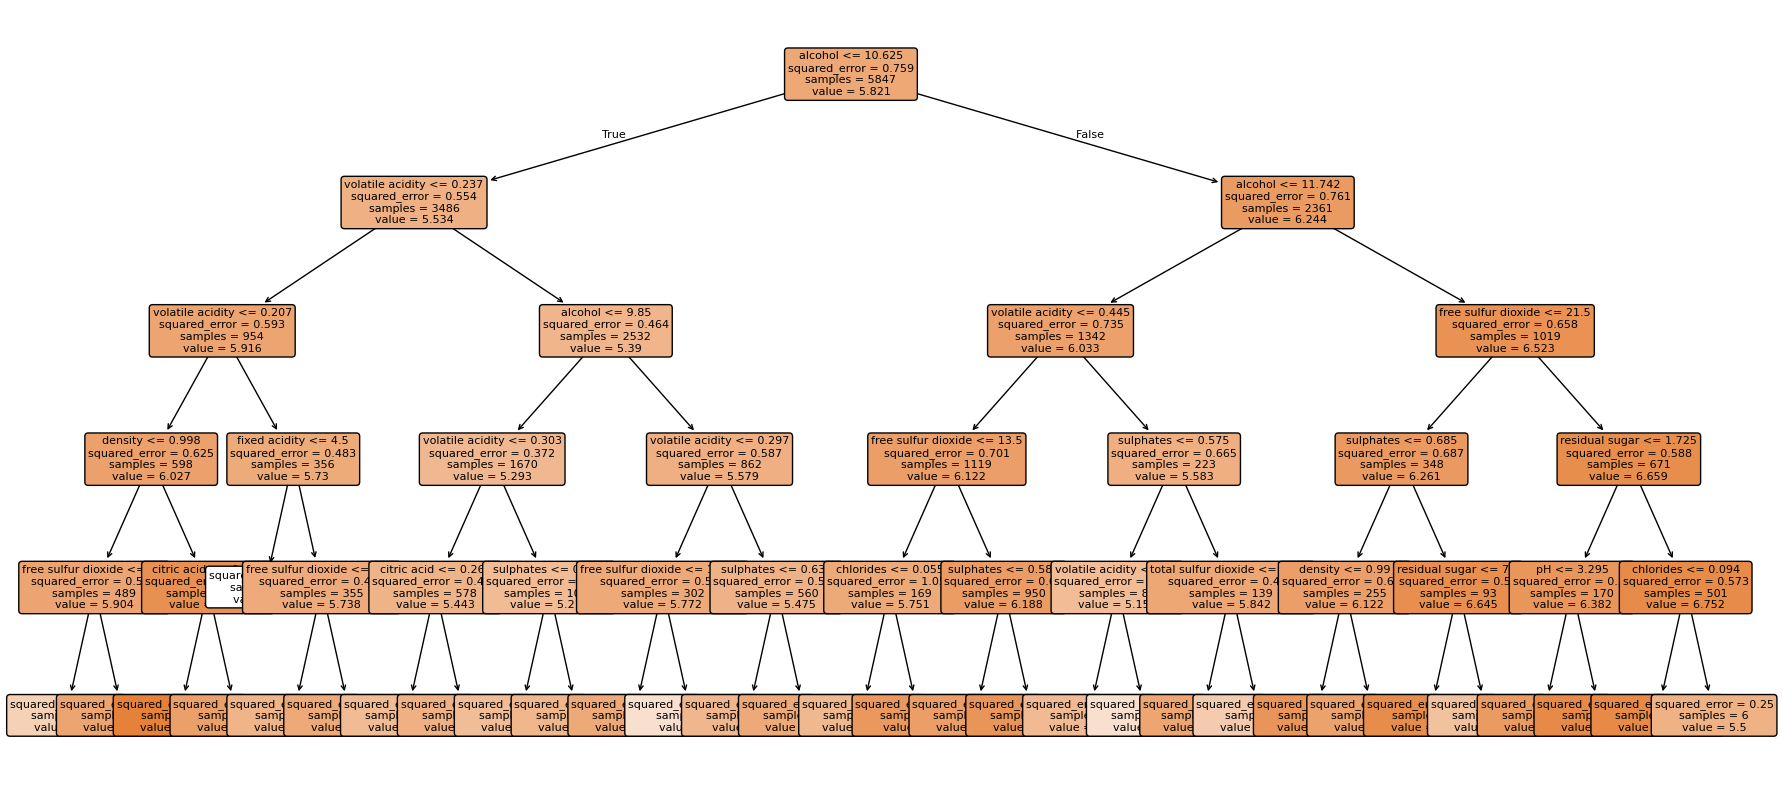

In [ ]:
best_model = grid2.best_estimator_

plt.figure(figsize=(22, 10))
tree.plot_tree(
    best_model,
    feature_names=df_full.drop(columns=['quality']).columns,
    filled=True,
    fontsize=8,
    rounded=True
)
plt.show()

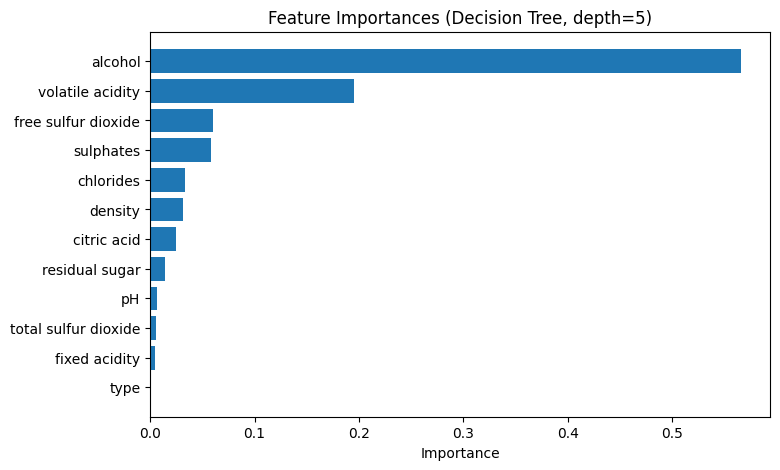

In [ ]:
importances = best_model.feature_importances_
names = df_full.drop(columns=['quality']).columns

sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.barh(names[sorted_idx], importances[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importances (Decision Tree, depth=5)")
plt.gca().invert_yaxis()
plt.show()

From the tree and the feature-importance plot, the model mainly uses alcohol and volatile acidity to estimate quality.
Higher alcohol and lower volatile acidity generally lead to higher predicted scores.
Some additional factors like sulphates, free sulfur dioxide, chlorides, and density contribute but much less.
Residual sugar, pH, fixed acidity and even the wine type have very small influence.
Overall, the model's rules show that wines tend to score better when they have higher alcohol, lower volatile acidity, and balanced sulphates and sulfur compounds.